<a href="https://colab.research.google.com/github/rania-azad/DL-Project1-10-07-2024/blob/main/Project_1_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition Project 🚀

Welcome to our exciting journey into the world of Deep Learning! In this project, you'll dive into the fascinating realm of handwritten digit recognition using PyTorch, one of the most popular machine learning libraries. 🧠💻

## Project Overview 📝

Your mission, should you choose to accept it, involves building and optimizing a PyTorch model to recognize handwritten digits from the MNIST dataset. This dataset is like the 'Hello World' of machine learning, perfect for beginners and yet intriguing for experienced coders. 🌟

## Learning Objectives 🎯

- **Understanding PyTorch**: Get hands-on experience with PyTorch, understanding its basic operations and how to build models with it.
- **Model Optimization**: Explore various training optimization techniques such as adding dropout layers, implementing regularizers, and utilizing early stopping to enhance model performance.
- **Experimentation**: Test different hyperparameters and observe how they impact your model's learning process and accuracy.

## Project Structure 🗂️

- **Data Preprocessing**: Learn how to prepare your data for optimal model training.
- **Model Building**: Design a neural network architecture suitable for digit recognition.
- **Training and Testing**: Implement the training loop, and test your model's performance.
- **Optimization Techniques**: Apply different optimization strategies to improve your model.

## TODOs 📌

Throughout this notebook, you'll find `TODO` sections. These are areas where you'll need to apply what you've learned and write your own code. Don't worry, though; guidance and hints are provided to help you on your journey!

So, are you ready to embark on this adventure in machine learning? Let's get started! 🚀👩‍💻👨‍💻

---

Remember, the goal of this project is not just to build a model but to experiment and learn. Every challenge you encounter is an opportunity to grow. Let's do this! 💪


## Loading the MNIST Dataset 📚

Before diving into the model building, the first crucial step is to load our dataset. In this section, you'll learn how to load and visualize the MNIST dataset, which is a collection of 70,000 grayscale images of handwritten digits (0 through 9). This dataset is widely used for training and testing in the field of machine learning. 🤖📈



In [1]:
# Import necessary libraries
# Torch contains all the necessary libraries for Deep Learning
import torch
# Torchvision contains different standard Datasets
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations applied on each image
# Transform is used to chain multiple transformation together, here we have:
# convert image to pytorch/tensor type, and normalize the images to speed the process {computation and save memory},
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# TODO: Load the MNIST Desitnation of Download Destination -  download which type (train or test) - List of functions
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# TODO: Create data loaders - we do not shuffle in predicting next word or time series or sequences (order relation)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 49242351.42it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1872991.01it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13674471.67it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4157688.51it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
# TODO: Figure out how many images are in the train_set and test_set.
print(len(train_set))
print(len(test_set))

60000
10000


Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})
Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})


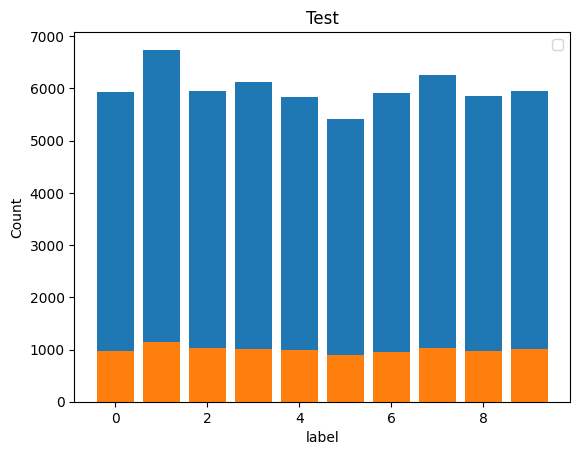

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

train_labels= train_set.targets
test_labels= test_set.targets
train_counter = Counter(train_labels.numpy())
test_counter = Counter(test_labels.numpy())

print(train_counter)
print(test_counter)

def plot_histogram(counter, title):
    plt.bar(counter.keys(), counter.values())
    plt.title(title)
    plt.xlabel("label")
    plt.ylabel("Count")
    plt.legend()
    plt.show

plot_histogram(train_counter, 'Train')
plot_histogram(test_counter, "Test")

## Building the Neural Network Model 🛠️

Now that our dataset is ready, it's time to build the neural network model that will learn to recognize handwritten digits. In this section, you will define the architecture of your neural network.

### Key Concepts:
- **Layers**: Neural networks are composed of layers. Each layer has a specific role, like convolutional layers for feature extraction or fully connected (dense) layers for decision making.
- **Activation Functions**: These functions introduce non-linear properties to the network, allowing it to learn more complex patterns.

In [15]:
# Import necessary PyTorch libraries
import torch.nn as nn
import torch.nn.functional as F

# TODO: Define the neural network class
# defined by class that is represented from nn model
# Net is an model from pytorch that has min 2 function /constructor
class Net(nn.Module):
     def __init__(self):
        super(Net, self).__init__()
        # TODO: Define layers of the neural network
        self.fc1 = nn.Linear(28*28,128 ) # First fully connected layer , 10 final class from 0 to 9
        #fully connected network will apply linear regression y*w, bias is b, bias=true which means y*w+b
        self.fc2 = nn.Linear(128,10 ) # second fully connected layer


# Flat the image x image of size 28*28 to vector one dimension
     def forward(self, x):
          # Flatten the input tensor , converted to vector of 10 values , each value represent prob,
          #ex: 1cell is the prob of value 0 using activation function using softmax
          x = x.view(-1, 28 * 28)
          # Pass it in linear layer fc1
          x = self.fc1(x)  # TODO: add an activation function
          x = F.relu(x)   #reduce overfitting       and non linearity
          x = self.fc2(x)
          #then pass it to softmax to get the probality
          return F.softmax(x, dim=1)

# Create an instance of the network
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


## Training the Neural Network Model 🏋️‍♀️🏋️‍♂️

With our neural network model defined, the next exciting step is to train it. This process involves feeding the training data to the model and adjusting the model parameters (weights and biases) based on the computed loss and the chosen optimization algorithm.

### Key Concepts:
- **Loss Function**: Measures how well the model performs. A common choice for classification tasks is Cross-Entropy Loss.
- **Optimizer**: Helps in updating the model parameters based on the computed gradients. We'll be using Stochastic Gradient Descent (SGD) in this example.
- **Epochs**: One epoch means the model has seen the entire dataset once. Training for multiple epochs means going through the dataset multiple times.



In [29]:
# TODO: Complete this code
# Import optimizer
from torch.optim import SGD

# TODO: Define the loss function and optimizer
# criterion = crossentropy = loss function = error function
criterion = nn.CrossEntropyLoss()
# Which algo will minimize the error which is SGD, works with batches,
# provide the weights (model.parameters),learning rate(lr): is the alpha or step to move
# SGD is iterative function
optimizer = SGD(model.parameters(), lr=0.01)

# TODO: Set the number of epochs
num_epochs = 10
train_losses=[]
test_losses=[]

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # TODO: Complete Training pass
        optimizer.zero_grad()
        output = model(images)
        loss=criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()


    else:
        print(f"Epoch {epoch+1}, Training Loss: {running_loss/len(train_loader)}")
        train_losses.append(running_loss/len(train_loader))
    # TODO: evaluate on the test_loader
    test_loss = 0.0
    for images, labels in test_loader:
        # TODO: Complete evaluation pass
        output=model(images)
        loss=criterion(output, labels)

        test_loss += loss.item()
    else:
        print(f" Test Loss: {test_loss/len(test_loader)}")
        test_losses.append(test_loss/len(test_loader))
print("Training is finished!")

Epoch 1, Loss: 1.9568576244657228
 Loss: 1.7803579477747535
Epoch 2, Loss: 1.7429640976859053
 Loss: 1.7067735741852195
Epoch 3, Loss: 1.7027194641038044
 Loss: 1.6835825898844725
Epoch 4, Loss: 1.685557704617474
 Loss: 1.6712014196784633
Epoch 5, Loss: 1.6753199361026414
 Loss: 1.6631186608296291
Epoch 6, Loss: 1.6682110841848703
 Loss: 1.6573400725224974
Epoch 7, Loss: 1.6629291813510823
 Loss: 1.6529102310253556
Epoch 8, Loss: 1.6587639029092118
 Loss: 1.649873526992312
Epoch 9, Loss: 1.65540695686076
 Loss: 1.6466744910379885
Epoch 10, Loss: 1.6525324688537288
 Loss: 1.6442766250318783
Training is finished!


<function matplotlib.pyplot.show(close=None, block=None)>

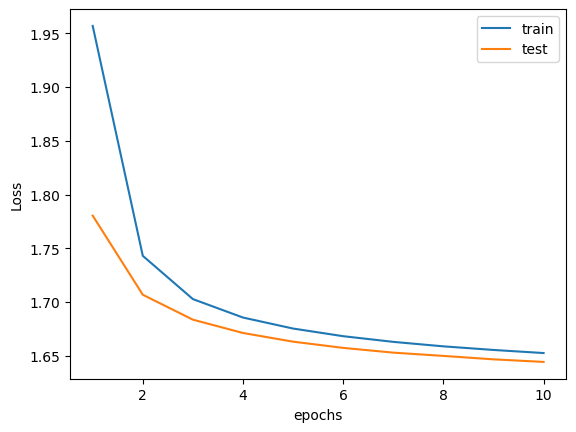

In [30]:
# TODO: plot the model complexity graph
import numpy as np
import matplotlib.pyplot as plt
epochs=np.arange(1,num_epochs + 1)
plt.plot(epochs, train_losses, label="train")
plt.plot(epochs, test_losses, label="test")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

### TODO1: Comment the model complexity graph
### TODO2: Change the model and add more layer (use a complex model)

## Implementing Early Stopping 🛑

One of the key techniques in training neural networks effectively is 'Early Stopping'. This technique halts the training process if the model performance stops improving on a held-out validation set. Early stopping is a form of regularization used to avoid overfitting.

### Key Concepts:
- **Validation Loss**: Monitor the loss on a validation set to detect when it begins to increase, indicating overfitting.

In [36]:
# TODO: Complete this code to implement Early stopping
patience = 5
min_delta = 0.01
best_loss = None
patience_counter = 0

# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss=criterion(output, labels)
         loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # evaluation phase
    model.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            validation_loss += criterion(output, labels).item()

    # Calculate average losses
    training_loss = running_loss / len(train_loader)
    validation_loss /= len(test_loader)

    print(f"Epoch {epoch+1}, Training Loss: {training_loss}, Validation Loss: {validation_loss}")

    # Early stopping logic
    if best_loss is None or validation_loss < best_loss - min_delta:
        best_loss = validation_loss # save the best loss since validation loss is small
        patience_counter = 0
    else:#increase in validation loss so we have to increase an epoch and check, if the validation loss is still continue to be bigger, we stop
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

print("Training is finished!")

Epoch 1, Training Loss: 1.6509879606364886, Validation Loss: 1.6442766250318783
Epoch 2, Training Loss: 1.6510067798181383, Validation Loss: 1.6442766250318783
Epoch 3, Training Loss: 1.6509952279550435, Validation Loss: 1.6442766250318783
Epoch 4, Training Loss: 1.6509924724157938, Validation Loss: 1.6442766250318783
Epoch 5, Training Loss: 1.6510311160514604, Validation Loss: 1.6442766250318783
Epoch 6, Training Loss: 1.6509941663823402, Validation Loss: 1.6442766250318783
Early stopping triggered!
Training is finished!


In [ ]:
# TODO: Answer this questions
# What does min_delta and patience refer to ?
# What is different from the first training ?

## Experimenting with Dropout 🌧️

Dropout is a regularization technique that temporarily drops units (along with their connections) from the neural network during training. This prevents units from co-adapting too much and helps the model to generalize better to unseen data.

### Key Concepts:
- **Dropout Rate**: The probability of a neuron being dropped during training. Common rates are 0.2, 0.5, etc.
- **Generalization**: Dropout improves the generalization of the model on the test data.


In [37]:
#due to co-adapting  => Solution is to add dropout
class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        # Define layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.2)  # Dropout layer with 20% probability
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        # Forward pass with dropout
        x = F.relu(self.fc1(x))
        # we pass it to dropout1 to reduce the neuron
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return F.softmax(x,dim=1)

# Create an instance of the network with dropout
model_with_dropout = NetWithDropout()
print(model_with_dropout)

NetWithDropout(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [44]:
# TODO: Complete this code
# Import optimizer
from torch.optim import SGD

# TODO: Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model_with_dropout.parameters(), lr=0.01)

# TODO: Set the number of epochs
num_epochs = 10
train_losses=[]
test_losses=[]

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # TODO: Complete Training pass
        optimizer.zero_grad()
        output = model_with_dropout(images)
        loss=criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()


    else:
        print(f"Epoch {epoch+1}, Train Loss: {running_loss/len(train_loader)}")
        train_losses.append(running_loss/len(train_loader))
    # TODO: evaluate on the test_loader
    test_loss = 0.0
    for images, labels in test_loader:
        # TODO: Complete evaluation pass
        output=model_with_dropout(images)
        loss=criterion(output, labels)

        test_loss += loss.item()
    else:
        print(f" Test Loss: {test_loss/len(test_loader)}")
        test_losses.append(test_loss/len(test_loader))
print("Training is finished!")

Epoch 1, Loss: 2.2831370721239526
 Loss: 2.2482077513530756
Epoch 2, Loss: 2.2127118019152805
 Loss: 2.16499620182499
Epoch 3, Loss: 2.0810884692267315
 Loss: 2.0146765511506683
Epoch 4, Loss: 1.9727012952253509
 Loss: 1.9324702123168167
Epoch 5, Loss: 1.8970122548308708
 Loss: 1.858651562860817
Epoch 6, Loss: 1.8386987041054503
 Loss: 1.8136325679766905
Epoch 7, Loss: 1.8033078577218533
 Loss: 1.7839407214693204
Epoch 8, Loss: 1.7808408340665578
 Loss: 1.7659708792996254
Epoch 9, Loss: 1.7670143992661922
 Loss: 1.7565288050159527
Epoch 10, Loss: 1.75496211844975
 Loss: 1.7448223039602777
Training is finished!


<function matplotlib.pyplot.show(close=None, block=None)>

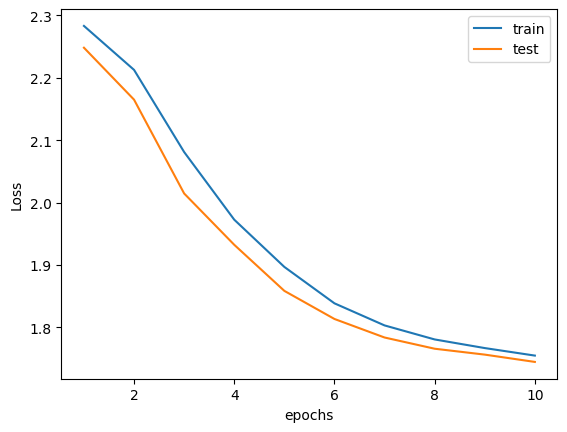

In [45]:
epochs=np.arange(1,num_epochs + 1)
plt.plot(epochs, train_losses, label="train")
plt.plot(epochs, test_losses, label="test")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

## Submitting Your Project on GitHub 🚀

Submitting your project on GitHub not only allows you to showcase your work but also helps in version control and collaboration. Here's how you can do it:

### Step 1: Create a New Repository on GitHub
1. **Sign in to GitHub**: Go to [GitHub](https://github.com) and sign in with your account.
2. **Create a New Repository**: Click on the '+' icon in the top right corner and select 'New repository'.
3. **Name Your Repository**: Give your repository a meaningful name, like 'handwritten-digit-recognition'.
4. **Initialize with a README**: Check the box 'Initialize this repository with a README'.
5. **Create Repository**: Click the 'Create repository' button.

### Step 2: Clone the Repository to Your Local Machine
1. **Copy the Repository URL**: On your repository page on GitHub, click the 'Code' button and copy the URL.
2. **Clone in Terminal**: Open your terminal, navigate to where you want the repository, and run `git clone [URL]`, replacing `[URL]` with the URL you copied.

### Step 3: Add Your Project to the Repository
1. **Copy Your Notebook**: Place your Jupyter notebook file into the cloned repository folder on your local machine.
2. **Add the File**: Run `git add [filename]` in your terminal, replacing `[filename]` with the name of your notebook file.

### Step 4: Commit and Push Your Changes
1. **Commit Your Changes**: Run `git commit -m "Add project notebook"`.
2. **Push to GitHub**: Run `git push` to push your changes to the GitHub repository.

### Step 5: Create and Edit the README File
1. **Edit README.md**: On GitHub, open the README.md file and click the pencil icon to edit.
2. **Write Your README**: Include a project title, a brief description, installation instructions, and usage instructions. Optionally, add screenshots or additional sections as needed.
3. **Save Changes**: After editing, commit your changes by clicking 'Commit changes' at the bottom.

### 📌 TODOs for Submission:
- Ensure your Jupyter notebook is well-commented and formatted.
- Write a clear, concise README that effectively describes your project.
- Double-check that all files have been committed and pushed to your GitHub repository.

---

Remember, a well-documented GitHub repository not only reflects your technical skills but also your ability to communicate and present your work effectively. Happy coding and best of luck with your project submission! 🌟👩‍💻👨‍💻
